In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
file_path = "../data/train.csv"
df = pd.read_csv(file_path)

In [5]:
print(f"Attributes : {df.columns}")

Attributes : Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
#Filling missing Age values with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\abd el rahmen\AppData\Local\Temp\ipykernel_14356\1787889441.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [19]:
#Filling missing Cabin values with the "?" value
df['Cabin'].fillna("?", inplace=True)

C:\Users\abd el rahmen\AppData\Local\Temp\ipykernel_14356\3403262819.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna("?", inplace=True)


In [21]:
# Drop rows where 'Embarked' values are missing (depending on analysis needs)
df.dropna(subset=['Embarked'], inplace=True)

In [23]:
num_rows, num_columns = df.shape
print(f"Rows : {num_rows} .")

Rows : 889 .


In [24]:
# Convert 'Survived' and 'Pclass' to integers
df['Survived'] = df['Survived'].astype(int)
df['Pclass'] = df['Pclass'].astype(int)

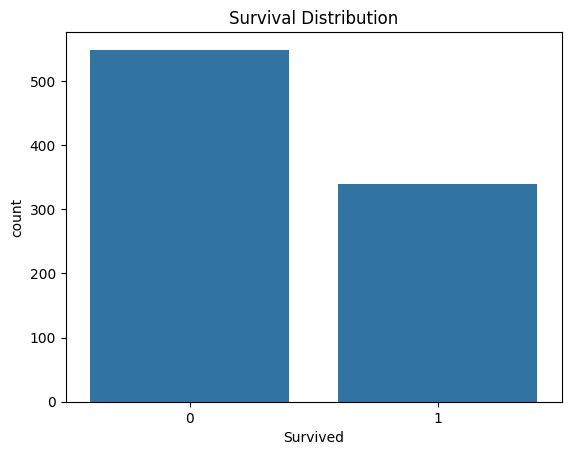

In [51]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution')
plt.savefig('../images/survival_distribution.png')
plt.show()
plt.close()

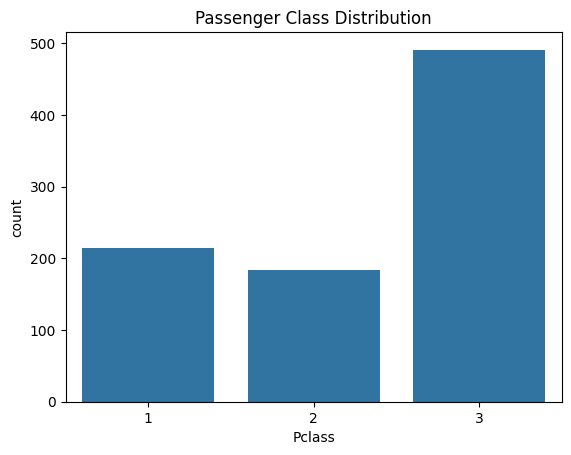

In [30]:
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()

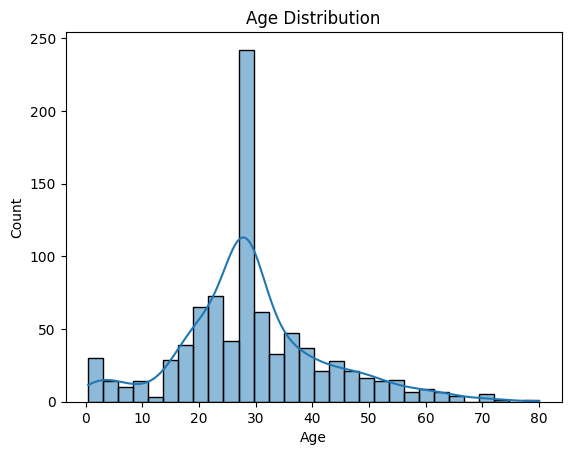

In [54]:
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.savefig('../images/age_distribution.png')
plt.show()
plt.close()

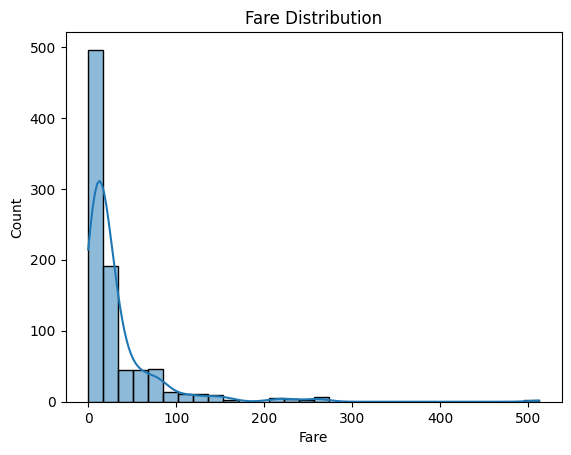

In [55]:
sns.histplot(df['Fare'], kde=True, bins=30)
plt.title('Fare Distribution')
plt.savefig('../images/fare_distribution.png')
plt.show()
plt.close()

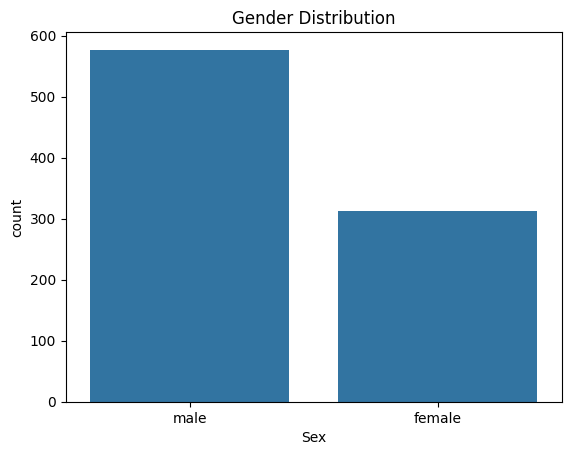

In [56]:
sns.countplot(x='Sex' , data=df)
plt.title('Gender Distribution')
plt.savefig('../images/gender_distribution.png')
plt.show()
plt.close()

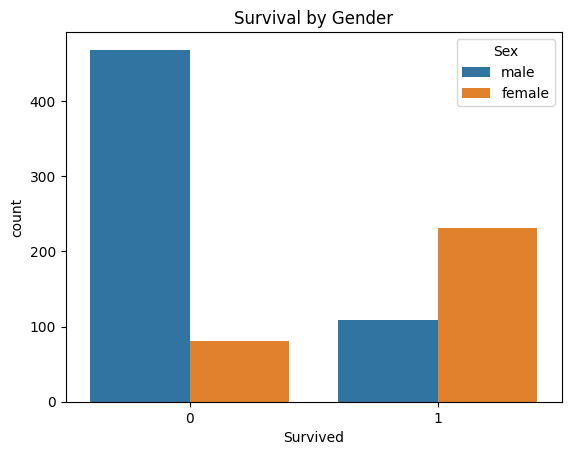

In [50]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival by Gender')
plt.savefig('../images/survival_by_gender.png')
plt.show()
plt.close()

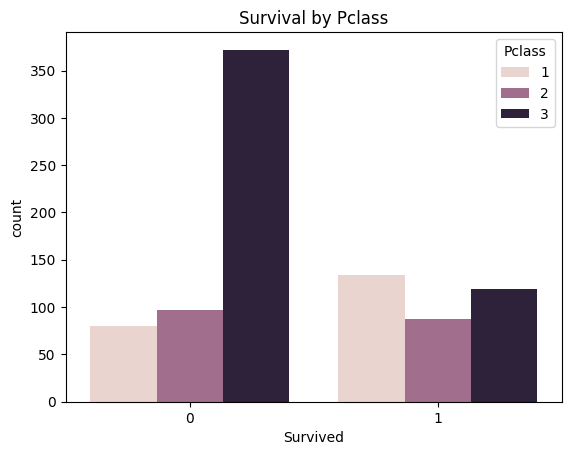

In [53]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival by Pclass')
plt.savefig('../images/survival_by_class.png')
plt.show()
plt.close()

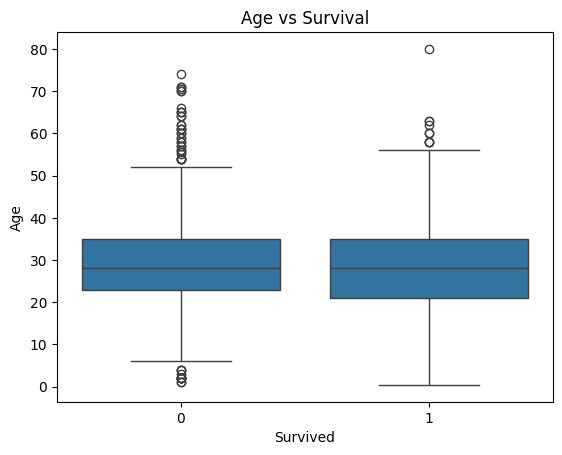

In [36]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survival')
plt.show()

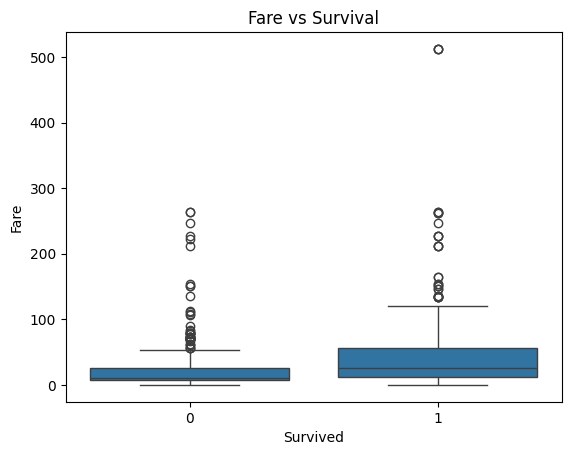

In [37]:
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare vs Survival')
plt.show()

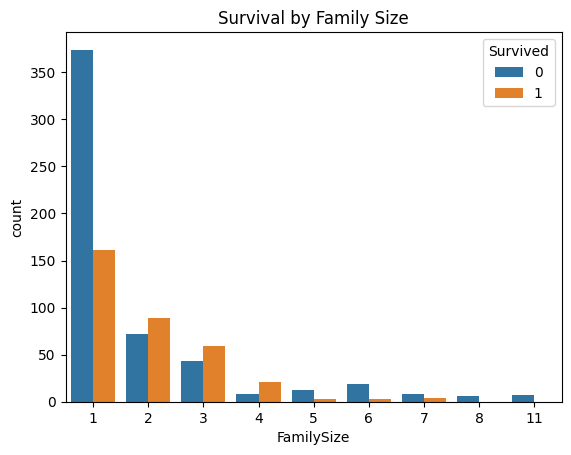

In [57]:
# Family size (SibSp + Parch + 1)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Survival by family size
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title('Survival by Family Size')
plt.savefig('../images/survival_by_family_size.png')
plt.show()
plt.close()

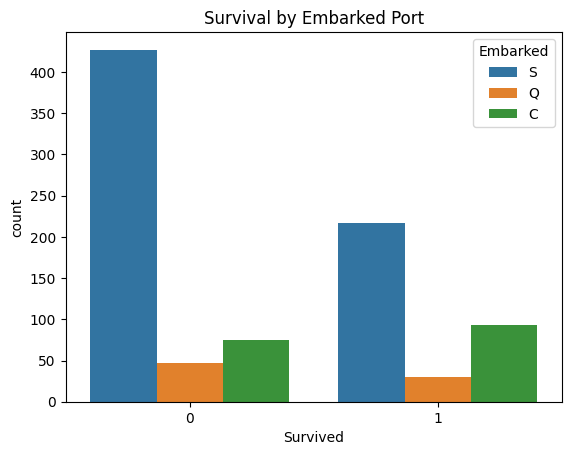

In [58]:
sns.countplot(x='Survived', hue='Embarked', data=df)
plt.title('Survival by Embarked Port')
plt.savefig('../images/survival_by_embarked.png')
plt.show()
plt.close()

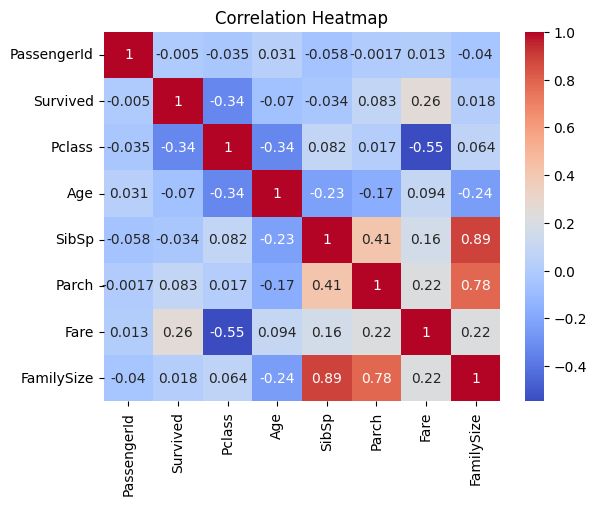

In [69]:
# Correlation heatmap
temp_df = df.select_dtypes(include=['number'])
correlation = temp_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('../images/correlation_heatmap.png')
plt.show()
plt.close()